# In this part, I'm gonna do Data Cleaning

#### To-do
1. import data
2. take a look at data 
3. check unique value in each column
4. summary the count of missing value in each column
5. Exclude features that aren't easily dealt with
6. deal with missing value
7. check result

In [1]:
# Library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
# 1. Import data
df_netflix = pd.read_csv("netflix_titles.csv")

In [24]:
# 2. Take a look at data
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [25]:
# 2. Take a look at data
# I see there are missing value in some columns, so I'm gonna deal with it, but before dealing with them,
# I have to check unique value in each column.

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [26]:
# 3. check unique value in each column
df_netflix.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [27]:
# 4. summary the cost of missing value in each column
# Based on step 3 and 4, I think director and cast are difficult to be dealt with, because there are too much missing value and distinct value 
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
# 5. Exclude features that aren't easily dealt with.
# I'm gonna drop direcotr and cast. Although title and description also contain distinct value, 
# I'm still gonna keep it, because they have hardly missing value

df_netflix = df_netflix.drop(["director", "cast"], axis = 1)

In [48]:
# 6. deal with missing value

# (1) drop missing value in date_added becasue idk when contents were added
df_netflix = df_netflix.dropna(subset = ["date_added"], axis = 0)

# (2) add missing value in rating manually by searching for them

# df_netflix[df_netflix["rating"].isna()]
# set up replacement map

rating_replacements = {
    211 : 'TV-14',
    2411 : 'TV-14',
    3288 : 'PG-13',
    4056 : 'TV-G',
    4402 : 'TV-G',
    4403 : 'TV-G',
    4706 : 'TV-14',
    5015 : 'TV-14',
    5234 : 'TV-14',}

# replace missing value
for i, rate in rating_replacements.items():
    df_netflix.iloc[i, 6] = rate
    
# (3) add missing value in country by mode of country.(It may lead to some bias, but I'm goona try it)

df_netflix["country"] = df_netflix["country"].fillna(df_netflix["country"].mode()[0])

In [49]:
# 7. check result. So I finish the first part.
df_netflix.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [50]:
# Here, I'm gonna use a packet called pandas_profilling to overview data
!pip3 install pandas_profiling
from pandas_profiling import ProfileReport

In [51]:
# produce report about data
report = ProfileReport(df_netflix)
report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# In this part, I'm gonna do feature creation

1. seperate date_added data into year and month
2. categorize rating into smaller category
3. modify dtype of data

In [53]:
# 1. seperate date_added data into year and month

df_netflix["year_added"] = df_netflix["date_added"].apply(lambda x : x.split(",")[-1])
df_netflix["month_added"] = df_netflix["date_added"].apply(lambda x : x.split(",")[0])

In [56]:
# 2. categorize rating into smaller category

rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df_netflix["target_ages"] = df_netflix["rating"].replace(rating_ages)
df_netflix['target_ages'].unique()

array(['Older Kids', 'Adults', 'Teens', 'Kids'], dtype=object)

In [60]:
# 3. modify dtype of data

df_netflix["type"] = pd.Categorical(df_netflix["type"])
df_netflix["target_ages"] = pd.Categorical(df_netflix["target_ages"], categories = ['Kids', 'Older Kids', 'Teens', 'Adults'])
df_netflix["year_added"] = pd.to_numeric(df_netflix["year_added"])
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6223 entries, 0 to 6222
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       6223 non-null   int64   
 1   type          6223 non-null   category
 2   title         6223 non-null   object  
 3   country       6223 non-null   object  
 4   date_added    6223 non-null   object  
 5   release_year  6223 non-null   int64   
 6   rating        6223 non-null   object  
 7   duration      6223 non-null   object  
 8   listed_in     6223 non-null   object  
 9   description   6223 non-null   object  
 10  year_added    6223 non-null   int64   
 11  month_added   6223 non-null   object  
 12  target_ages   6223 non-null   category
dtypes: category(2), int64(3), object(8)
memory usage: 595.8+ KB


In [102]:
# 4. yield principal country(retreieve the first country)
df_netflix["principal_country"] = df_netflix["country"].apply(lambda x : x .split(",")[0])
df_netflix["principal_country"].head(10)

0     United States
1    United Kingdom
2     United States
3     United States
4     United States
5             Spain
6          Bulgaria
7             Chile
8     United States
9     United States
Name: principal_country, dtype: object

## In this part, I'm gonna do Visualization

In [62]:
!pip3 install plotly 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [87]:
# deal with listed_in data and split it.
df_netflix["genre"] = df_netflix['listed_in'].apply(lambda x : x.split(","))

list

### Overview the percentage in each type

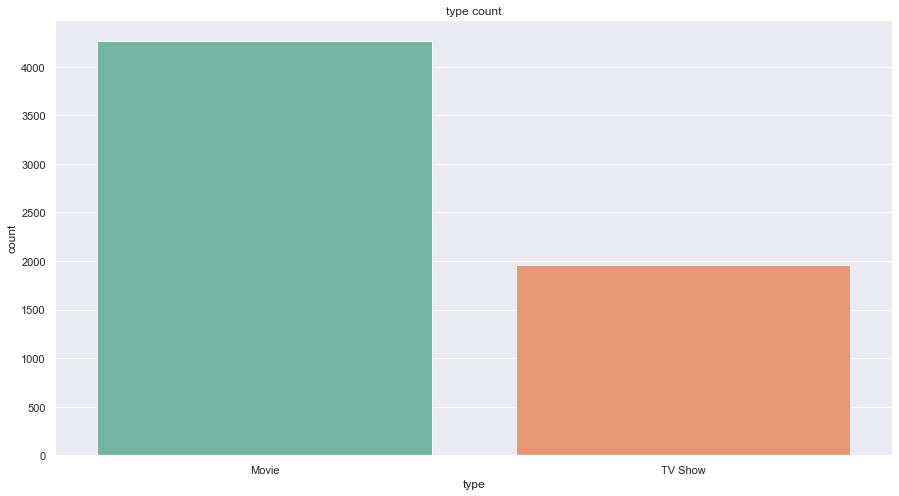

In [121]:
# At first, I want to overview the percentage in each type, so I'm gonna plot countplot and pie chart

plt.figure(figsize = (15, 8))
sns.set(style = "darkgrid")
plt.title("type count")
sns.countplot(data = df_netflix, x = "type", palette = "Set2")

In [122]:
# And I'm gonna show it with pie chart

fig = px.pie(df_netflix['type'].value_counts().reset_index(), values = 'type', names = 'index')
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.show()

## Basic Conclusion : 
* Netflix had movies more then TV Show
* But how's the trend? Is it still the same in recent years???

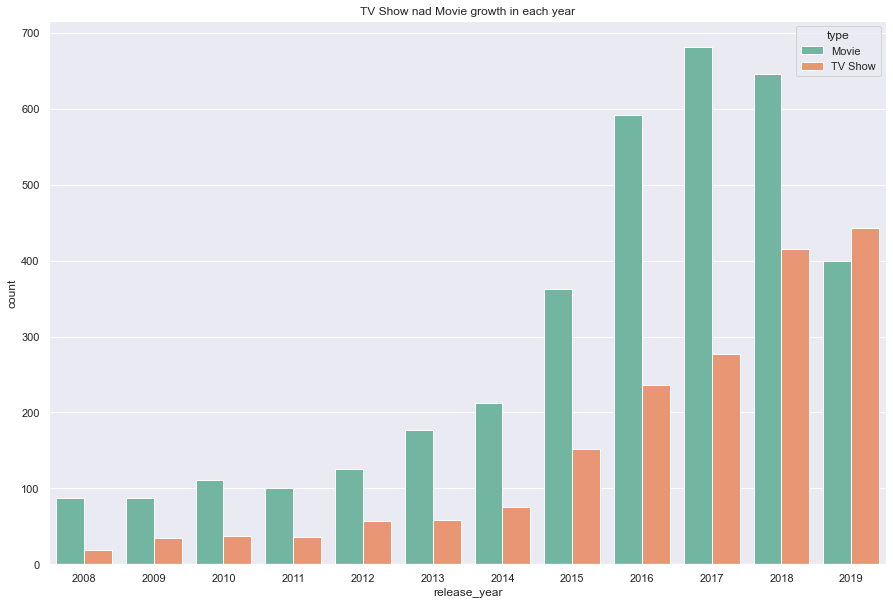

In [127]:
# I only see the percentage of them, but Idk the growth of them, so I'm gonna plot the growth

years = []
index = np.where(df_netflix["release_year"].value_counts() > 100)
df_year_value_count = df_netflix["release_year"].value_counts()

for year in df_year_value_count.iloc[index].index:
    years.append(year)

compare_data = df_netflix[df_netflix["release_year"].isin(years)]
plt.figure(figsize = (15, 10))
plt.title("TV Show nad Movie growth in each year")
sns.countplot(x = "release_year", data = compare_data, hue = "type", palette = "Set2")

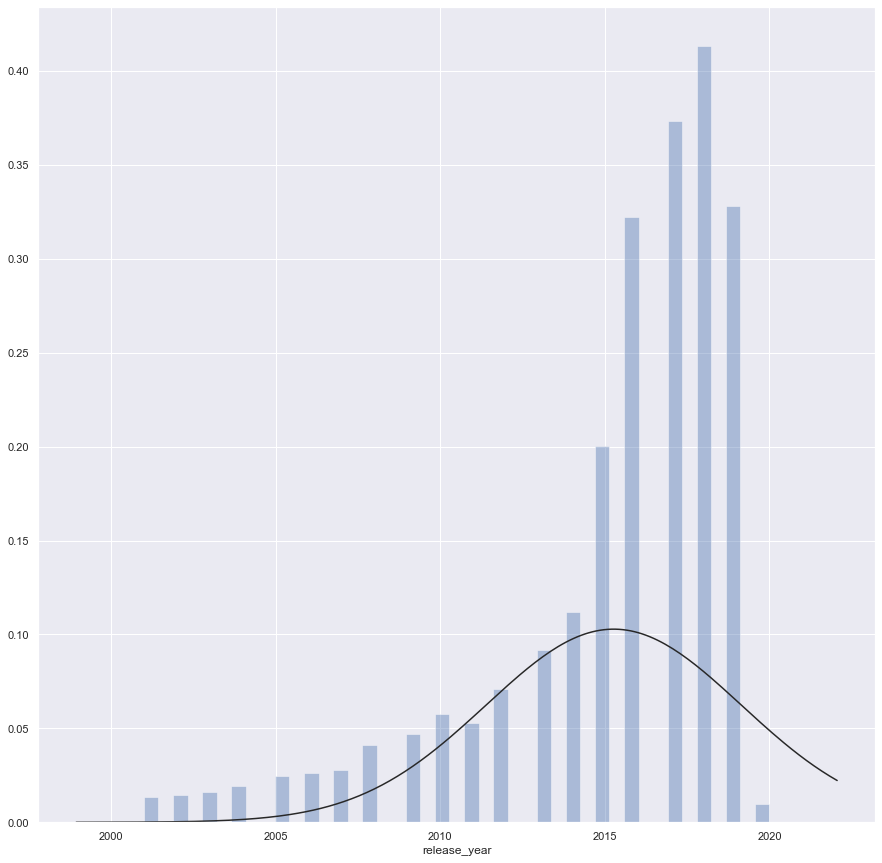

In [300]:
# Show release in each year with dirstribution line
# from scipy.stats import norm
# plt.figure(figsize = (15, 15))
# sns.distplot(df_netflix.loc[df_netflix['release_year'] > 2000, 'release_year'], fit=norm, kde = False)

## Second Conclusion : 
* Netflix grown in a fast rate, but I had to know the percentage

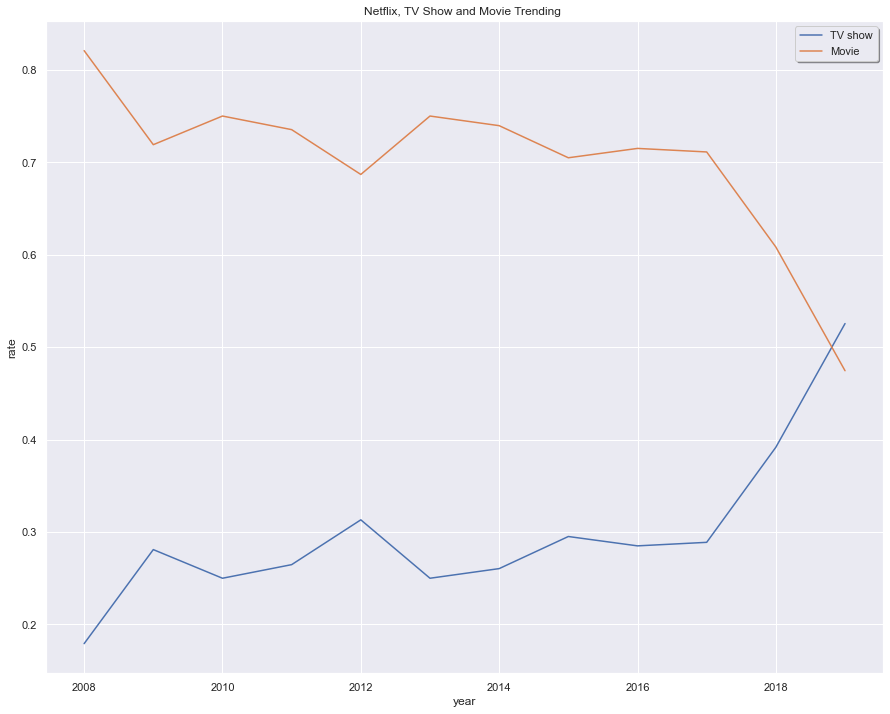

In [133]:
count_dict_each_year = dict(compare_data["release_year"].value_counts())
count_dict_each_year.keys()
TV_Show_count = {}
TV_Show_count_rate = {}
Movie_count = {}
Movie_count_rate = {}

# TV Show
for year in count_dict_each_year.keys():
    temp = compare_data[(compare_data["release_year"] == year) & (compare_data["type"] == "TV Show")]
    TV_Show_count[year] = len(temp)
    
for year in count_dict_each_year.keys():
    TV_Show_count_rate[year] = TV_Show_count[year] / count_dict_each_year[year]

keys = list(TV_Show_count_rate.keys()) 
values = list(TV_Show_count_rate.values())
df_TV_count_rate = pd.DataFrame({"year" : keys, "rate" : values})

# Movie
for year in count_dict_each_year.keys():
    temp = compare_data[(compare_data["release_year"] == year) & (compare_data["type"] == "Movie")]
    Movie_count[year] = len(temp)
    
for year in count_dict_each_year.keys():
    Movie_count_rate[year] = Movie_count[year] / count_dict_each_year[year]
    
keys = list(Movie_count_rate.keys()) 
values = list(Movie_count_rate.values())
df_Movie_count_rate = pd.DataFrame({"year" : keys, "rate" : values})


# ploting
plt.figure(figsize = (15, 12))
plt.title("Netflix, TV Show and Movie Trending ")
sns.lineplot(data = df_TV_count_rate, x = "year", y = "rate", label = "TV show")
sns.lineplot(data = df_Movie_count_rate, x = "year", y = "rate", label = "Movie")
plt.legend(loc = 'upper right', shadow = True) 


##  Final Conclusion : 
* The trend line crossed in 2019, but I still can't conclude Netflix has  put emphasis on TV Show in recent year because the data isn't enough, I need data more about 2020 and 2021. But I still can see a trend that begin at 2017, it grows, and in a rapid rate

### Overview contents are made by which country
* I'm gonna seperate data into contents made by one country or more. To see which country collabarate with others more.

In [144]:
# Create one column to seperate countries
df_netflix["isMultipleCountry"] = df_netflix["country"].apply(lambda x : len(x.split(",")) > 1)

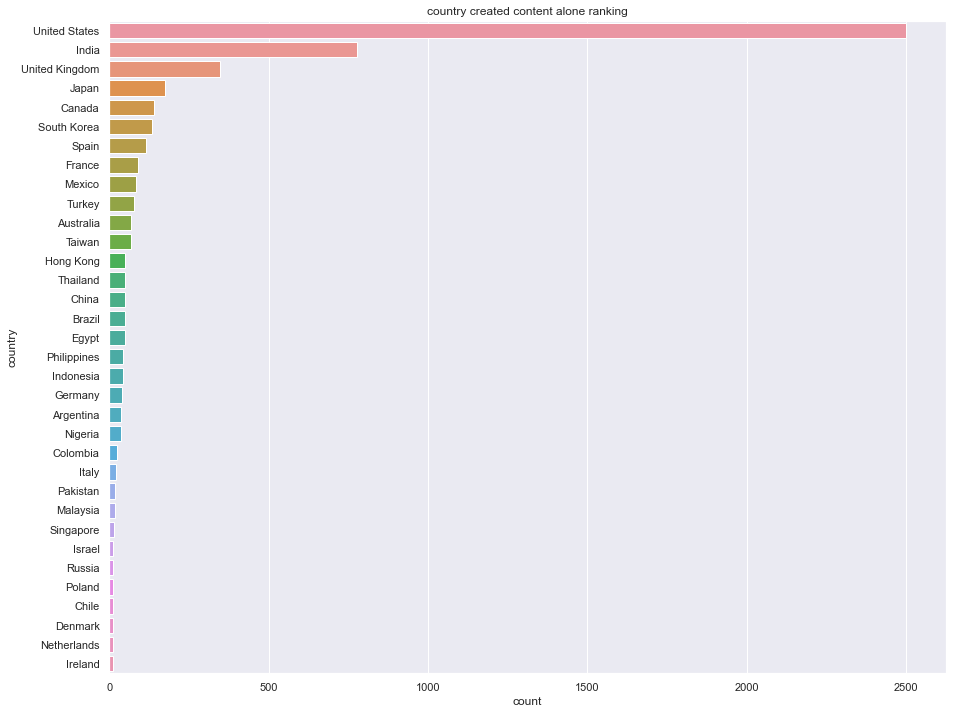

In [150]:
df_solo = df_netflix[df_netflix["isMultipleCountry"] != True]
# first deal with data that repesents creating contents alone
dic_country = dict(df_solo["country"].value_counts()) 
df_solo_country = pd.DataFrame({"country" : list(dic_country.keys()), "count" : list(dic_country.values())})

# I just want to see some high-ranking country, so I set the threashold (10) (At least created 10 movies)
df_solo_country = df_solo_country[df_solo_country["count"] > 10]

# plotting
plt.figure(figsize = (15, 12))
plt.title("country created content alone ranking")
sns.barplot(data = df_solo_country, x = "count", y = "country")

### First conclusion 
* Counts of United States should be reduced because we fillna by United States(less than 476). However, this won't change the result becasue the number of the USA is far from the number of India. So we can conclude that United States created contents alone the most, and India after.... To my surprise, Taiwan, my country, in top20. It's good that we are good in film field.

<ipython-input-285-b40e9e16396f>:35: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



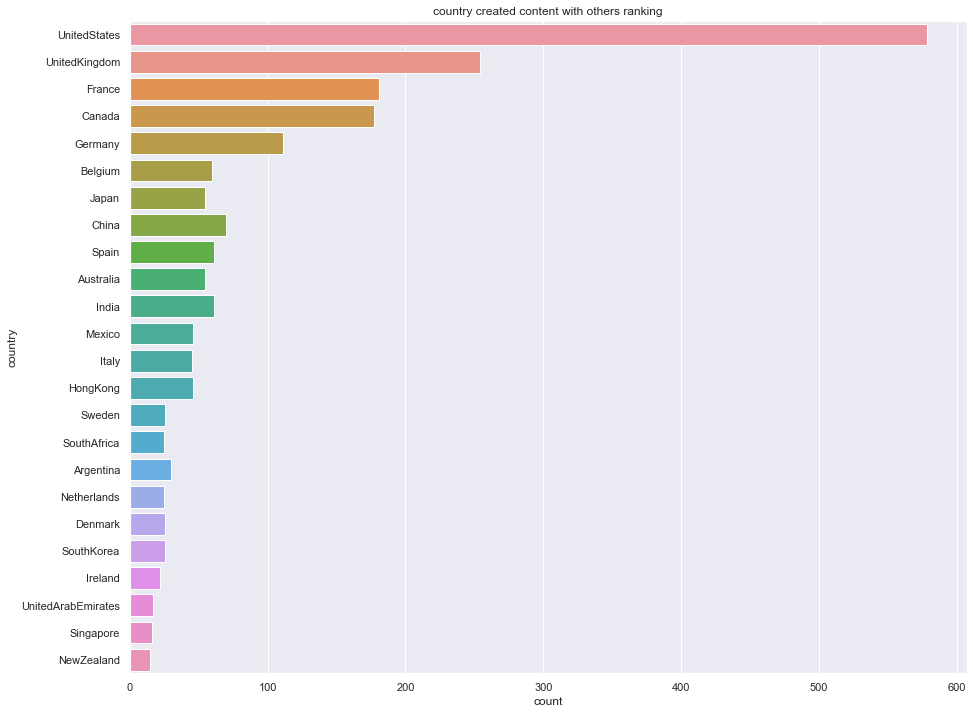

In [285]:
# now I'm gonna deal with multiple one

df_multiple = df_netflix[df_netflix["isMultipleCountry"] == True]

# Because multiple data are stored in type string, so I have to transform them into list type
multiple_list = df_multiple["country"].apply(lambda x : x.split(","))

# mapping
dict_multiple = {}
for countries in multiple_list:
    for country in countries:
        if country in list(dict_multiple.keys()):
            dict_multiple[country] += 1
        else:
            dict_multiple[country] = 1
            
df_multiple_country = pd.DataFrame({"country" : list(dict_multiple.keys()), "count" : list(dict_multiple.values())})
df_multiple_country = df_multiple_country.sort_values(by = ["count"], ascending = False)

# dealing with exception(seperate exception)

df_multiple_country["country"] = df_multiple_country["country"].apply(lambda x : x.replace(' ', ''))
df_multiple_country2 = df_multiple_country[df_multiple_country["country"].duplicated(keep = "first")]
df_multiple_country1 = df_multiple_country[df_multiple_country["country"].duplicated(keep = "last")]
    
for country in list(df_multiple_country2["country"]):   
    if country in list(df_multiple_country1["country"]):
        index1 = np.where(df_multiple_country1["country"] == country)
        index2 = np.where(df_multiple_country2["country"] == country)
        count1 = df_multiple_country1.iloc[index1[0], 1]
        count2 = df_multiple_country2.iloc[index2[0], 1]
        df_multiple_country1.iloc[index1[0], 1] = int(count1) + int(count2)
        
# The same, I'm gonna set threasohold.
df_multiple_country1 = df_multiple_country1[df_multiple_country["count"] > 10]

# plotting
plt.figure(figsize = (15, 12))
plt.title("country created content with others ranking")
sns.barplot(data = df_multiple_country1, x = "count", y = "country")




In [109]:
# In this part, I'm gonna show principal country making contents in this pie chart.
country_df = df_netflix['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values = 'principal_country', names = 'index')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()

### final conclusion:
* So the ranking changes, India, Taiwan, fell out of their own position. We can guess that these countries tend to create contents by themselves. And China climbs up, we can conclude that China collabrates with others more than created alone

### Overview contents made by which rating

In [63]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

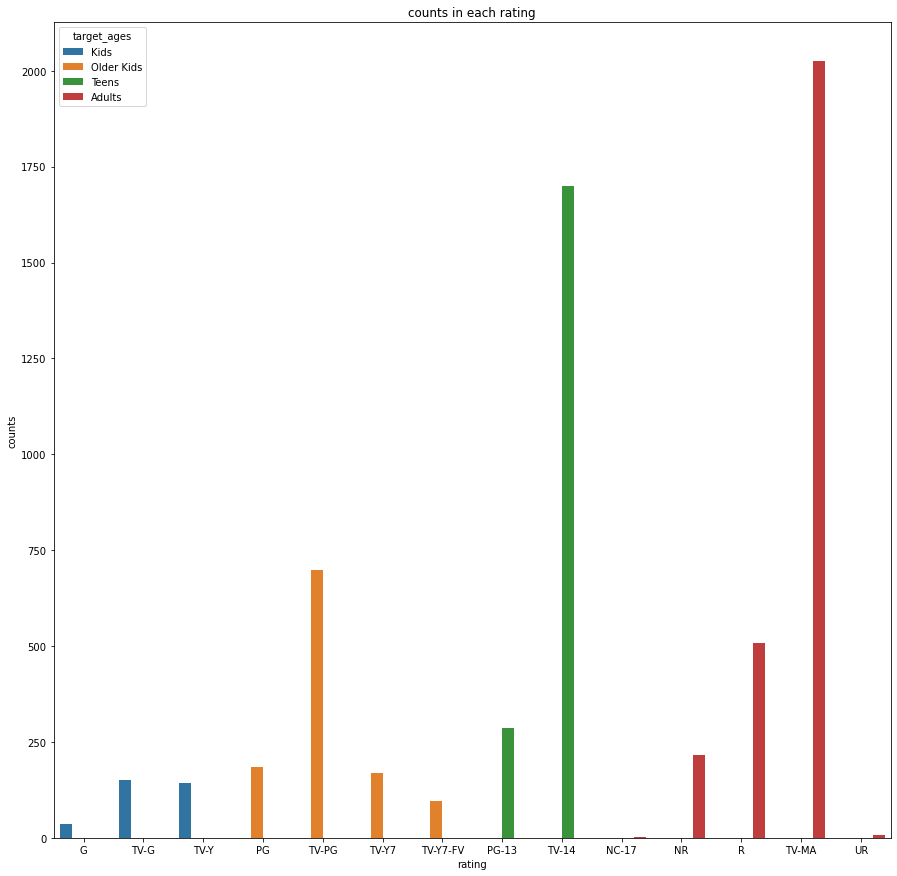

In [96]:
# display counts of each rating
rating_df = generate_rating_df(df_netflix)

plt.figure(figsize = (15 ,15))
plt.title("counts in each rating")
sns.barplot(data = rating_df, x = "rating", y = "counts", hue = "target_ages")
# fig = px.bar(rating_df, x = 'rating', y = 'counts', color = 'target_ages')
# fig.show()

In [294]:
# create movie and show dataframe separately 

movie_df = df_netflix[df_netflix['type'] == 'Movie']
show_df = df_netflix[df_netflix['type'] == 'TV Show']

In [295]:
# display the percentage of each rating in TV Show and Movie

movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows = 1, cols = 2, specs = [[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels = movie_rating_df['target_ages'], values = movie_rating_df['counts']),
    row = 1, col = 1
)

fig.add_trace(
    go.Pie(labels = show_rating_df['target_ages'], values = show_rating_df['counts']),
    row = 1, col = 2
)

fig.update_traces(textposition = 'inside', hole = .4, hoverinfo = "label+percent+name")
fig.update_layout(
    title_text = "Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations = [dict(text = 'Movies', x = 0.16, y = 0.5, font_size = 12, showarrow = False),
                 dict(text = 'TV Shows', x = 0.82, y = 0.5, font_size = 12, showarrow = False)])
fig.show()

### First Conclusion 
* It's obvious that contents in Netflix are made for 7y up, especially for adults, and we have to see trends in each rating
* And in the pie chart, we can find that there is a higher percentage in making Movies for Adults and lower for Kids. However, in TV Show, we find something different.

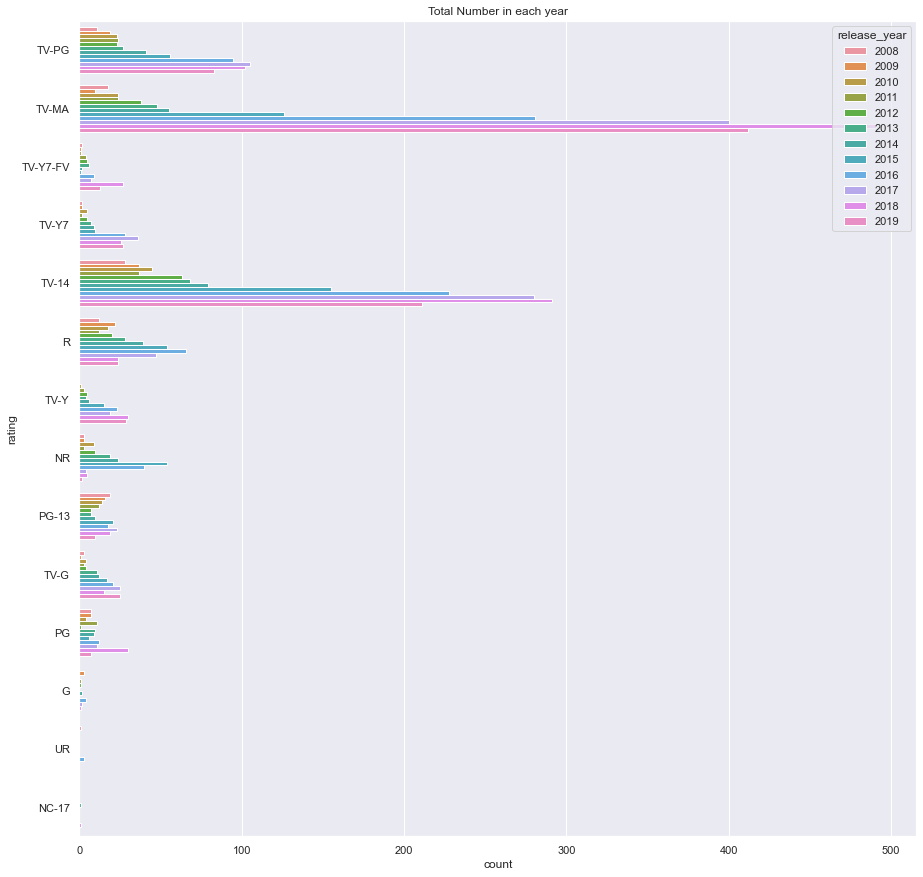

In [287]:
# mapping years, and setting threadshold
years = []
index = np.where(df_netflix["release_year"].value_counts() > 100)
temp = df_netflix["release_year"].value_counts()

for year in temp.iloc[index].index:
    years.append(year)
    
df_rating = df_netflix[df_netflix["release_year"].isin(years)]
plt.figure(figsize = (15, 15))
plt.title("Total Number in each year")
sns.countplot(data = df_rating, y = "rating", hue = "release_year")

In [297]:
# In this part, I'll show trend of rating by line chart
released_year_df = df_netflix.loc[df_netflix['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = df_netflix.loc[df_netflix['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x = released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y = released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode = 'lines+markers',
    name = 'Movie: Released Year',
    marker_color = 'green',
))
fig.add_trace(go.Scatter( 
    x = released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y = released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode = 'lines+markers',
    name = 'TV Show: Released Year',
    marker_color = 'darkgreen',
))
fig.add_trace(go.Scatter( 
    x = added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y = added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode = 'lines+markers',
    name = 'Movie: Year Added',
    marker_color = 'orange',
))
fig.add_trace(go.Scatter( 
    x = added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y = added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode = 'lines+markers',
    name = 'TV Show: Year Added',
    marker_color = 'darkorange',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

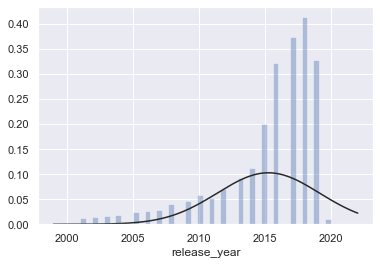

### Second Conclusion 
* We can see that contents made in recent years for adutls are growing, and the highest is in 2018
* But I wonder what countries made what kind of contents, so in next part, I'm gonna deep in it

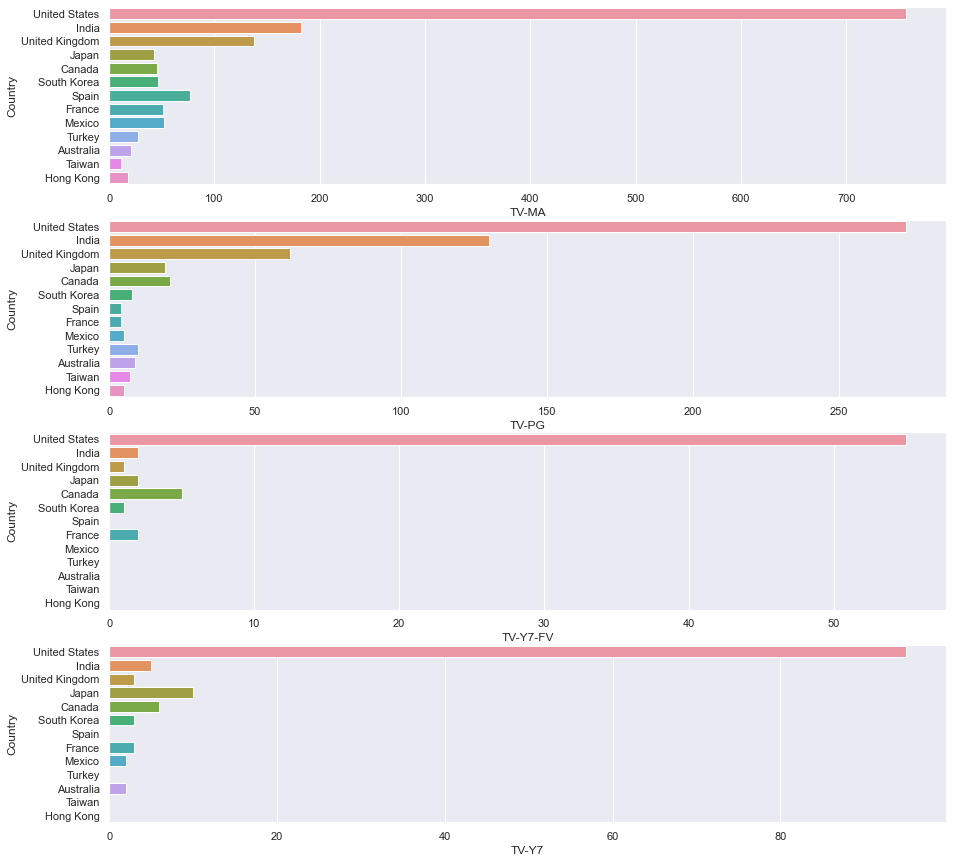

In [293]:
# function summary rating
def rate_sum(df, country):
    data_list = []
    data_list.append(country)
    for rate in df["rating"].unique():
        total_number = len(df[(df["rating"] == rate) & (df["country"] == country)])
        data_list.append(total_number)
    return data_list

# create dataframe for counting each country_rating
column_index = list(df_netflix["rating"].unique())
column_index.insert(0, "Country") 
df_rating_each_country = pd.DataFrame(columns = column_index)

for i, country in enumerate(df_netflix["country"].unique()):
    answer = rate_sum(df_netflix, country)
    df_rating_each_country.loc[i] = answer

summary_list = []
for i in range(len(df_rating_each_country)):
    summary = 0
    target = list(df_rating_each_country.loc[i])
    for j in range(len(target) - 1):
        summary = summary + target[j + 1]
    summary_list.append(summary)
    
df_rating_each_country["Total"] = summary_list 
df_rating_each_country = df_rating_each_country.sort_values(by = ["Total"], ascending = False) 

# threashold
target = df_rating_each_country[df_rating_each_country["Total"] > 50]

# plotting
plt.figure(figsize = (15, 15))
plt.subplot(4, 1, 1)
sns.barplot(y = target["Country"], x = target["TV-MA"])
plt.subplot(4, 1, 2)
sns.barplot(y = target["Country"], x = target["TV-PG"])
plt.subplot(4, 1, 3)
sns.barplot(y = target["Country"], x = target["TV-Y7-FV"])
plt.subplot(4, 1, 4)
sns.barplot(y = target["Country"], x = target["TV-Y7"])

### Final Conclusion
* because of the figsize, I only can choose 4 of them if order to keep the easy-to-see platform. And we can find that some tops of rating are not always India or Canada.., like TV-Y7_FV, Japan made more than them. So, in this part, we can use the name to find out what we want.

### Overviewing which type of contents are created most ( I didn't finish it )

In [301]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [302]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns = mlb.classes_, index = series.index)
    return mlb_df

In [303]:
def top_genres(df, title = 'Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x = tdata.index,
        y = tdata.values,
    ))
    fig.update_xaxes(categoryorder = 'total descending')
    fig.update_layout(title = title)
    fig.show()

In [309]:
plt.figure(figsize = (15, 15))
top_genres(movie_df, title = 'Top Movies Genres')
top_genres(show_df, title = 'Top TV Shows Genres')

<Figure size 1080x1080 with 0 Axes>

In [306]:
top_genres(show_df, title='Top TV Shows Genres')

### Showing Correaltion bewteen each kind of contents (I didnt' finish it)

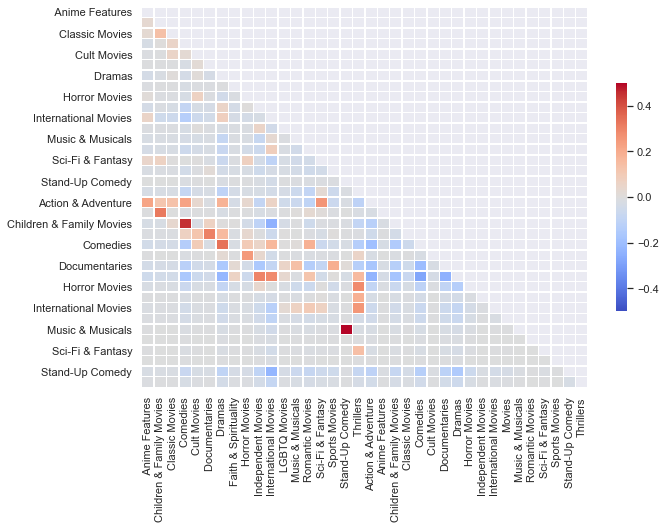

In [310]:
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize = (10, 7))
pl = sns.heatmap(movie_corr, mask = movie_mask, cmap = "coolwarm", vmax = .5, vmin = -.5, center = 0, linewidth = .5,
                 cbar_kws={"shrink": 0.6})
plt.show()

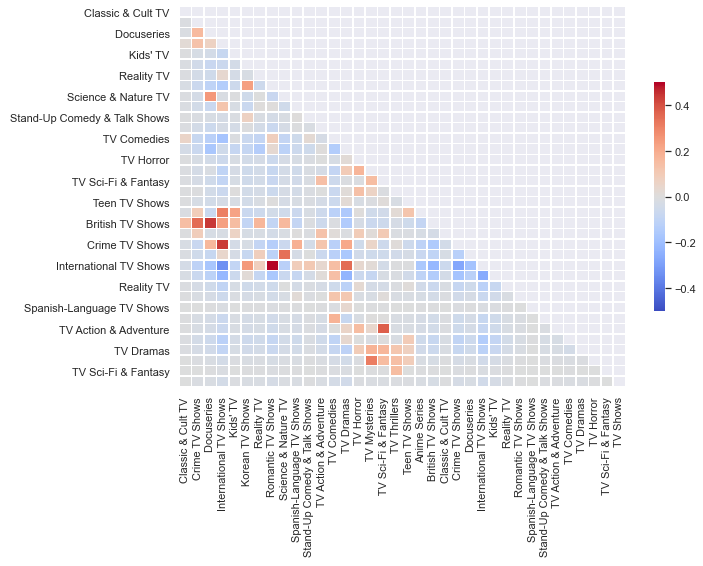

In [311]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype = np.bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize = (10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap = "coolwarm", vmax = .5, vmin = -.5, center = 0, linewidths = .5,
                 cbar_kws={"shrink": 0.6})
plt.show()

### Creating Wordcloud

In [314]:
! pip3 install wordcloud
from wordcloud import WordCloud

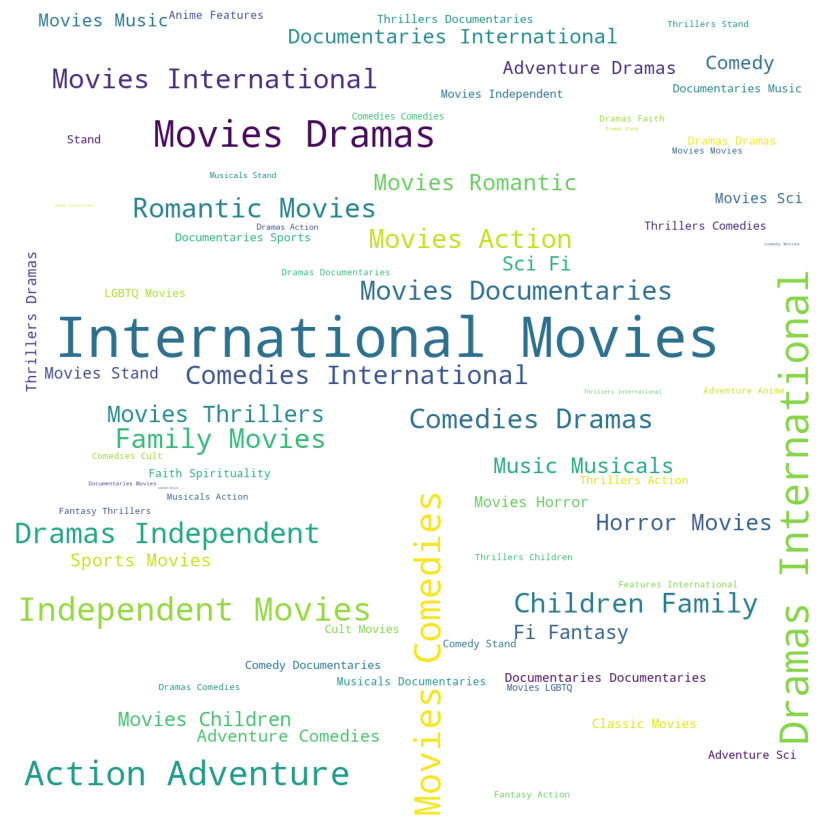

In [315]:
text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()